# Predicating heart Diseases using Machine learning

Aims to create a model capable of predicating whether or not someone  has heart diseases based on their medical attributes.

# Create data dictionary:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl (1= true; 0 = false)
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
* target (1 or 0) 


In [1]:
# Import all the tools we need


# EDA libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
df = pd.read_csv('heart-disease.csv')
df.shape

(303, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:>

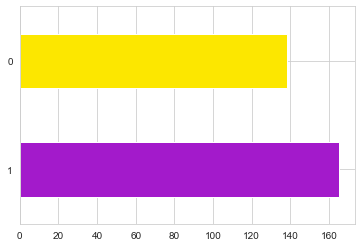

In [4]:
## Data Exploration (EDA)

df.target.value_counts().plot(kind='barh', color=['#A31ACB','#FCE700']) #Balanced data set

In [5]:
df.isna().sum() # No missing values in dataset

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
#  Heart diseases frequency to sex

df.sex.value_counts() # 0 - Female, 1 - Male

1    207
0     96
Name: sex, dtype: int64

Text(0.5, 1.0, 'Heart Diseases VS Sex')

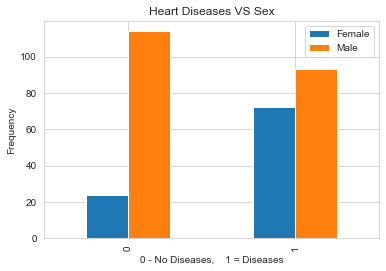

In [9]:
plot1 = pd.crosstab(df.target,df.sex).plot(kind='bar')
plt.xlabel('0 - No Diseases,    1 = Diseases')
plt.ylabel('Frequency')
plt.legend(['Female','Male'])
plt.title('Heart Diseases VS Sex')

Text(0.5, 1.0, 'Age and Max Heart rate')

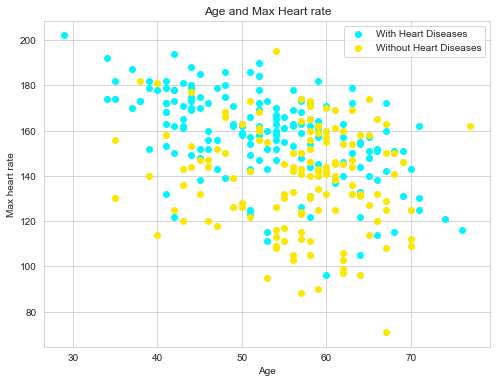

In [10]:
#thalach - Maximum heart rate achieved VS Age for Heart Diseases

plt.figure(figsize=(8,6))

# Plot for person with Heart diseases
plt.scatter(df.age[df.target == 1], y=df.thalach[df.target == 1], c= '#00F5FF', label='With Heart Diseases')

# Plot for person without Heart diseases
plt.scatter(df.age[df.target == 0], y = df.thalach[df.target == 0], c = '#FCE700', label ='Without Heart Diseases')
plt.legend()

plt.xlabel("Age")
plt.ylabel('Max heart rate')
plt.title('Age and Max Heart rate')

Text(0.5, 1.0, 'Heart diseases and Chest pain type')

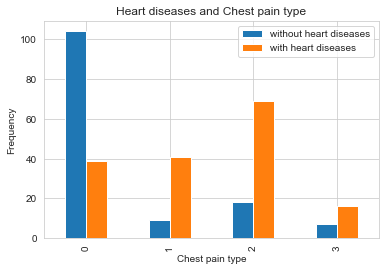

In [11]:
# Heart diseases and Chest pain type

pd.crosstab(df.cp,df.target).plot(kind='bar')
plt.xlabel('Chest pain type')
plt.ylabel('Frequency')
plt.legend(['without heart diseases','with heart diseases'])
plt.title('Heart diseases and Chest pain type')

# People with type 2 pain has more probability of having heart diseases, 
# Inferred from below graph

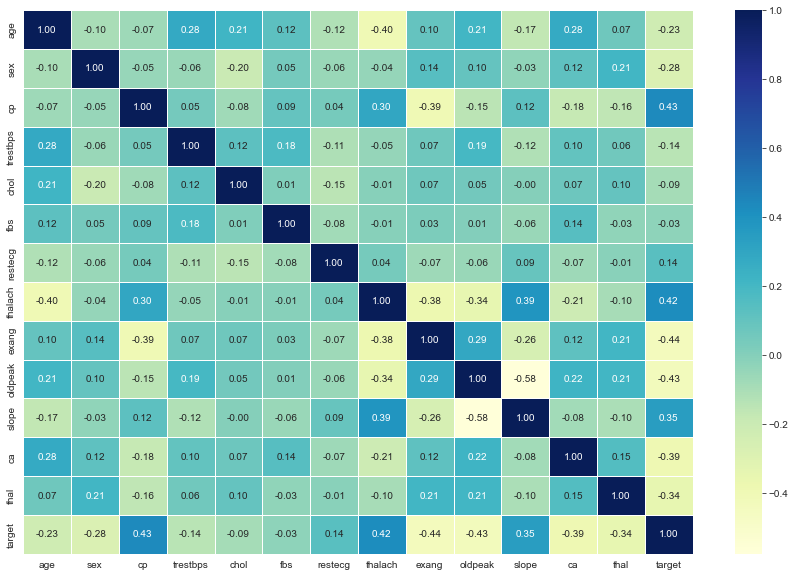

In [12]:
# Correlation matrix with Heatmap

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(data=df.corr(),annot=True, 
                 linewidths=0.5, fmt ='.2f', cmap='YlGnBu')


In [13]:
# Modelling our data

# Create X and y
X = df.drop('target', axis = 1)
y = df.target

# Split the data
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [14]:
# Put models in a dictionary

models = {'Logistic regression': LogisticRegression(),
          'KNN':KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}


# Create a funtion to fit and return score of the models

def  fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fit and evaluates given machine learning models.
    """
    np.random.seed(42)
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)    
              
    return model_scores

In [15]:
model_scores = fit_and_score(models,X_train,X_test,y_train,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


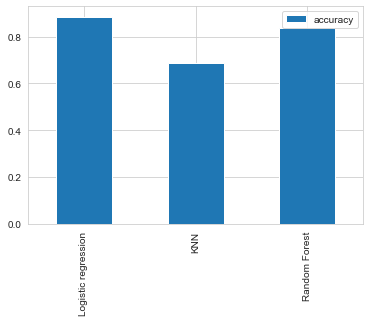

In [16]:
# Model Comparsion

model_compare = pd.DataFrame(model_scores, index=['accuracy']).T.plot(kind= 'bar')
plt.legend(loc='upper right')

In [17]:
## Hyperparameter tuning - KNN

train_scores = []
test_scores = []
error_rate_test = []

neighbors = range(1,21)
knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    
    pred_i_test = knn.predict(X_test)
    
    #Train scores
    train_scores.append(knn.score(X_train,y_train))
    
    #Test scores
    test_scores.append(knn .score(X_test,y_test))
    
    
    # Mean of all values (Incorrected predicated values)
    error_rate_test.append(np.mean(pred_i_test != y_test))
        
    

Maximum KNN score on the test data: 75.41


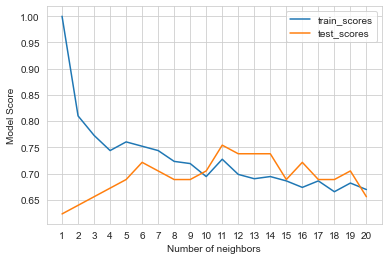

In [18]:
plt.plot(neighbors, train_scores, label = 'train_scores')
plt.plot(neighbors, test_scores, label = 'test_scores')
plt.xticks(np.arange(1,21))
plt.xlabel('Number of neighbors')
plt.ylabel('Model Score')

print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}')

plt.legend()

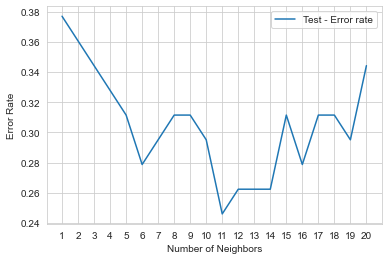

In [19]:
plt.plot(neighbors, error_rate_test, label = 'Test - Error rate')
plt.xticks(np.arange(1,21))
plt.xlabel('Number of Neighbors')
plt.ylabel('Error Rate')

plt.legend()

# Maximum accuracy & Min error rate at when K = 11

In [20]:
# Hyperparametertuning using RandomizedSearchCV 
#                                  -Logistic Regression & RandomForestClassifier


# For Logistic Regression
log_reg_grid = {
                'C' : np.logspace(-4,4,20),
                'solver' :['liblinear']}

# For RandomForest Classifier
rf_grid = {
            'n_estimators':np.arange(10,1000,50),
            'max_depth' :[None,3,5,10],
            'min_samples_split':np.arange(2,20,2),
            'min_samples_leaf':np.arange(1,20,2)
}

In [21]:
np.random.seed(42)

# Tuning Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                    param_distributions=log_reg_grid,
                                   cv =5,
                                   verbose = True,
                                   n_iter = 30)

rs_log_reg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 20 is smaller than n_iter=30. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=30,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [22]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [23]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [24]:
np.random.seed(42)

# Tuning RandomForestClassifier

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions= rf_grid,
                           cv= 5,
                           verbose=True,
                           n_iter=20
)


rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [25]:
# Best parameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [26]:
rs_rf.score(X_test,y_test)

# Increased Score as per compared to baseline model

0.8688524590163934

In [27]:
# Hyperparameter tunning with GridSearchCV - Logistic Regression
np.random.seed(42)
log_reg_grid = {
    
            'C':np.logspace(-4,4,20),
            'solver': ['liblinear']
}

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit the GridSearchCV
gs_log_reg.fit(X_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [28]:
gs_log_reg.best_params_

{'C': 1.623776739188721, 'solver': 'liblinear'}

In [29]:
gs_log_reg.score(X_test,y_test)

0.9344262295081968

## Evaluting our Models

* ROC curve and AUC Score
* Confusion matrix
* Classification Report
* Precision
* Recall
* F1-Score

In [30]:
y_preds = gs_log_reg.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


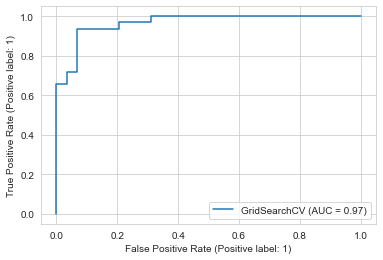

In [31]:
#Plot ROC Curve and calucate AUC

plot_roc_curve(gs_log_reg, X_test,y_test)

In [32]:
# Confustion matrix

def plot_conf_matrix(y_test,y_preds):
    """
    plot confustion matrix with y_test and y_preds
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),annot=True)
    plt.xlabel('Predicated label')
    plt.ylabel('True label')

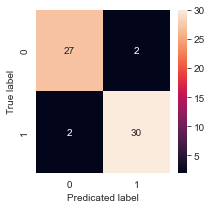

In [33]:
plot_conf_matrix(y_test,y_preds)

In [34]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        29
           1       0.94      0.94      0.94        32

    accuracy                           0.93        61
   macro avg       0.93      0.93      0.93        61
weighted avg       0.93      0.93      0.93        61



In [35]:
## Calucalting Evaluation metrics using Cross validation

# Best Hyperparameters 
gs_log_reg.best_params_

{'C': 1.623776739188721, 'solver': 'liblinear'}

In [36]:
clf = LogisticRegression(C=1.623776739188721, solver = 'liblinear')



In [37]:
# Cross validated accuracy

cv_acc = cross_val_score(clf,X,y, cv=5, scoring='accuracy')
np.mean(cv_acc)

0.8182513661202186

In [38]:
# Cross validated precision

cv_precision = cross_val_score(clf,X,y, cv=5, scoring='precision')
np.mean(cv_precision)

0.8122549019607843

In [39]:
# Cross validated Recall

cv_recall = cross_val_score(clf,X,y, cv=5, scoring='recall')
np.mean(cv_recall)

0.8727272727272727

In [40]:
# Cross validated F1-Score

cv_f1_score = cross_val_score(clf,X,y, cv=5, scoring='f1')
np.mean(cv_f1_score)

0.8404818247075424

In [41]:
# Cross - Validated metrics

cv_metrics = pd.DataFrame({'Accuracy':np.mean(cv_acc),
                          'Precision':np.mean(cv_precision),
                          'Recall':np.mean(cv_recall),
                          'F1-Score':np.mean(cv_f1_score)} ,index=[0])

<AxesSubplot:>

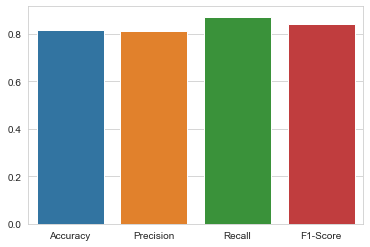

In [42]:
sns.barplot(data=cv_metrics)